# Nama Anggota Kelompok FangFengFong:

1. Azel Rizki Nasution
2. Ravikasha Davva Imawant
3. Achmad Mundir Wicaksono

Link Colab: https://bit.ly/MiniProjectDay5FangFengFong

# 1. Exploratory Data Analysis (EDA)

In [19]:
import pandas as pd
import warnings
warnings.simplefilter("ignore")

df = pd.read_csv("Global Electricity Net Generation Statistics.csv")
df

,Country,Region,Year,Net Generation
0,Algeria,Africa,1980,6.683000
1,Angola,Africa,1980,0.905000
2,Benin,Africa,1980,0.005000
3,Botswana,Africa,1980,0.443000
4,Burkina Faso,Africa,1980,0.098000
...,...,...,...,...
9655,Trinidad and Tobago,Central & South America,2021,8.726319
9656,Turks and Caicos Islands,Central & South America,2021,0.272540
9657,U.S. Virgin Islands,Central & South America,2021,0.692507
9658,Uruguay,Central & South America,2021,15.823520


In [20]:
df.describe()

,Year,Net Generation
count,9660.000000,8791.000000
mean,2000.500000,76.621992
std,12.121546,367.048417
min,1980.000000,0.000000
25%,1990.000000,0.372170
50%,2000.500000,3.907700
75%,2011.000000,31.412900
max,2021.000000,8151.518231


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         9660 non-null   object 
 1   Region          9660 non-null   object 
 2   Year            9660 non-null   int64  
 3   Net Generation  8791 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 302.0+ KB


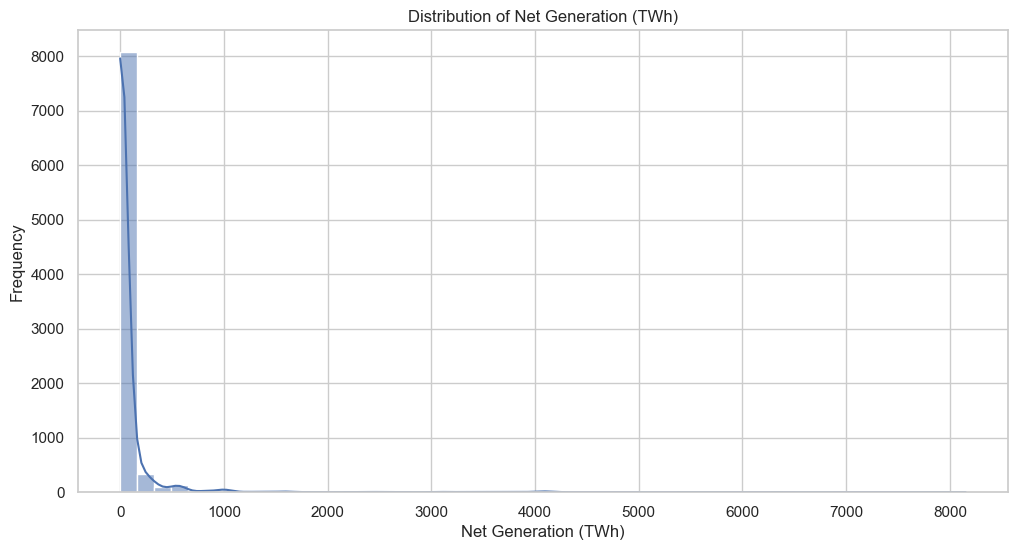

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Cek distribusi data yang hilang untuk dilakukan imputasi
plt.figure(figsize=(12, 6))
sns.histplot(df["Net Generation"], bins=50, kde=True)
plt.title("Distribution of Net Generation (TWh)")
plt.xlabel("Net Generation (TWh)")
plt.ylabel("Frequency")
plt.show()


In [23]:
# Imputasi data "Net Generation" dengan median karena distribusi data yang skew
median_net_generation = df["Net Generation"].median()
df["Net Generation"].fillna(median_net_generation, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         9660 non-null   object 
 1   Region          9660 non-null   object 
 2   Year            9660 non-null   int64  
 3   Net Generation  9660 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 302.0+ KB


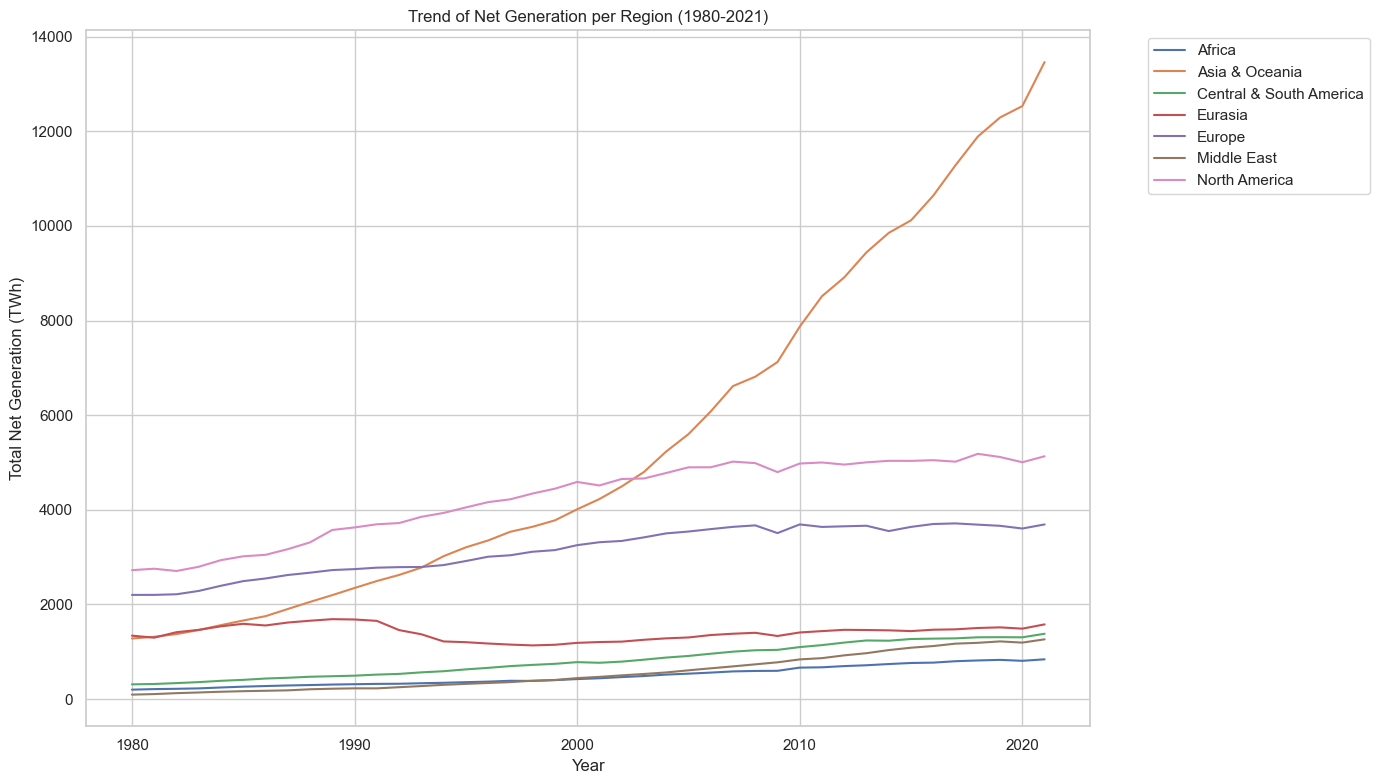

In [25]:
# Data Total Net Generation berdasarkan Region dan Tahun
region_year_grouped = df.groupby(["Region", "Year"])["Net Generation"].sum().reset_index()

# Tren Tahunan Net Generation untuk tiap Region
plt.figure(figsize=(14, 8))
sns.lineplot(x="Year", y="Net Generation", hue="Region", data=region_year_grouped)
plt.title("Trend of Net Generation per Region (1980-2021)")
plt.xlabel("Year")
plt.ylabel("Total Net Generation (TWh)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


> Region Asia dan Oceania menunjukkan peningkatan produksi listrik yang sangat signifikan sejak tahun 2000, menjadikannya region dengan produksi listrik terbesar.

> Meskipun mengalami fluktuasi, region Amerika Utara secara konsisten memiliki produksi listrik yang tinggi, terutama sejak tahun 1980 hingga sekitar tahun 2000.

> Mirip dengan Amerika Utara, region Eropa juga menunjukkan tren yang stabil namun dengan peningkatan yang lebih moderat sejak tahun 2000.

> Region Amerika Selatan & Amerika Tengah, Eurasia, Timur Tengah, dan Afrika, memiliki produksi listrik yang relatif lebih rendah dibandingkan dengan region lainnya, dengan tren peningkatan yang lebih lambat.

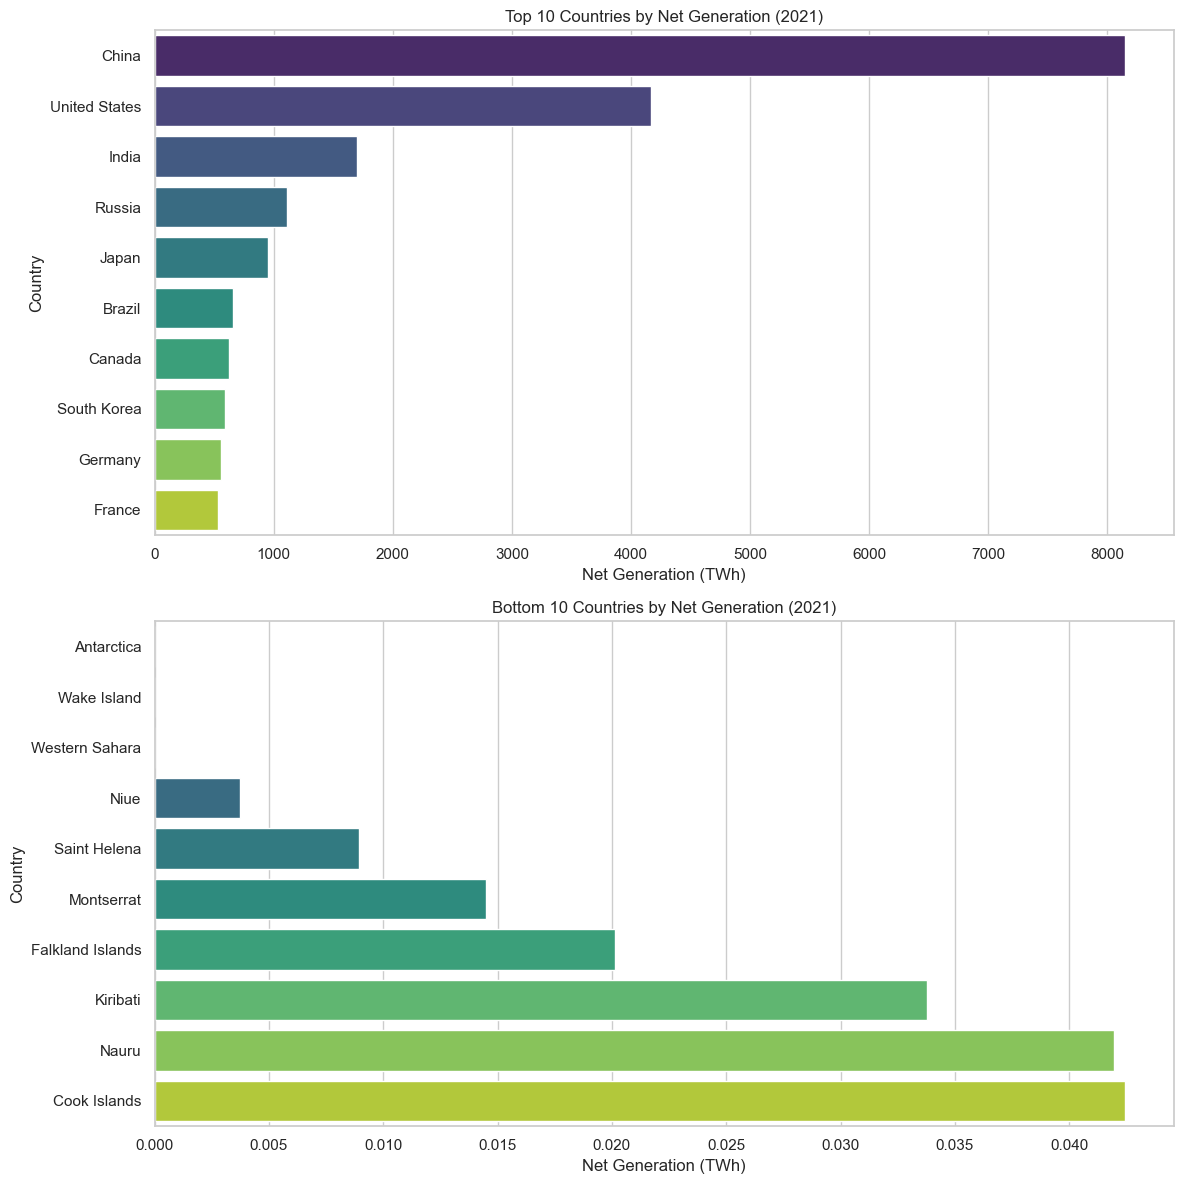

In [26]:
df_2021 = df[df["Year"] == 2021]

top_10_countries = df_2021.sort_values(by="Net Generation", ascending=False).head(10)
bottom_10_countries = df_2021.sort_values(by="Net Generation", ascending=True).head(10)

# Bar Plot 10 Negara dengan Net Generation Tertinggi dan Terendah pada Tahun 2021 (tahun terakhir dataset)
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

sns.barplot(x="Net Generation", y="Country", data=top_10_countries, ax=ax[0], palette="viridis")
ax[0].set_title("Top 10 Countries by Net Generation (2021)")
ax[0].set_xlabel("Net Generation (TWh)")
ax[0].set_ylabel("Country")

sns.barplot(x="Net Generation", y="Country", data=bottom_10_countries, ax=ax[1], palette="viridis")
ax[1].set_title("Bottom 10 Countries by Net Generation (2021)")
ax[1].set_xlabel("Net Generation (TWh)")
ax[1].set_ylabel("Country")

plt.tight_layout()
plt.show()


> China memiliki produksi listrik yang jauh lebih tinggi dibandingkan negara lainnya, mencapai lebih dari 8000 TWh.

> Amerika Serikat berada di posisi kedua, dengan produksi listrik yang juga sangat tinggi, tetapi kurang dari setengah dari produksi listrik China.

> Negara-negara lain seperti India, Rusia, dan Jepang juga memiliki produksi listrik yang signifikan, tetapi masih jauh di bawah China dan Amerika Serikat.

> Negara-negara seperti Cook Islands, Nauru, dan Kiribati memiliki produksi listrik yang sangat rendah, yaitu kurang dari 1 TWh.

# 2. Time Series Analysis

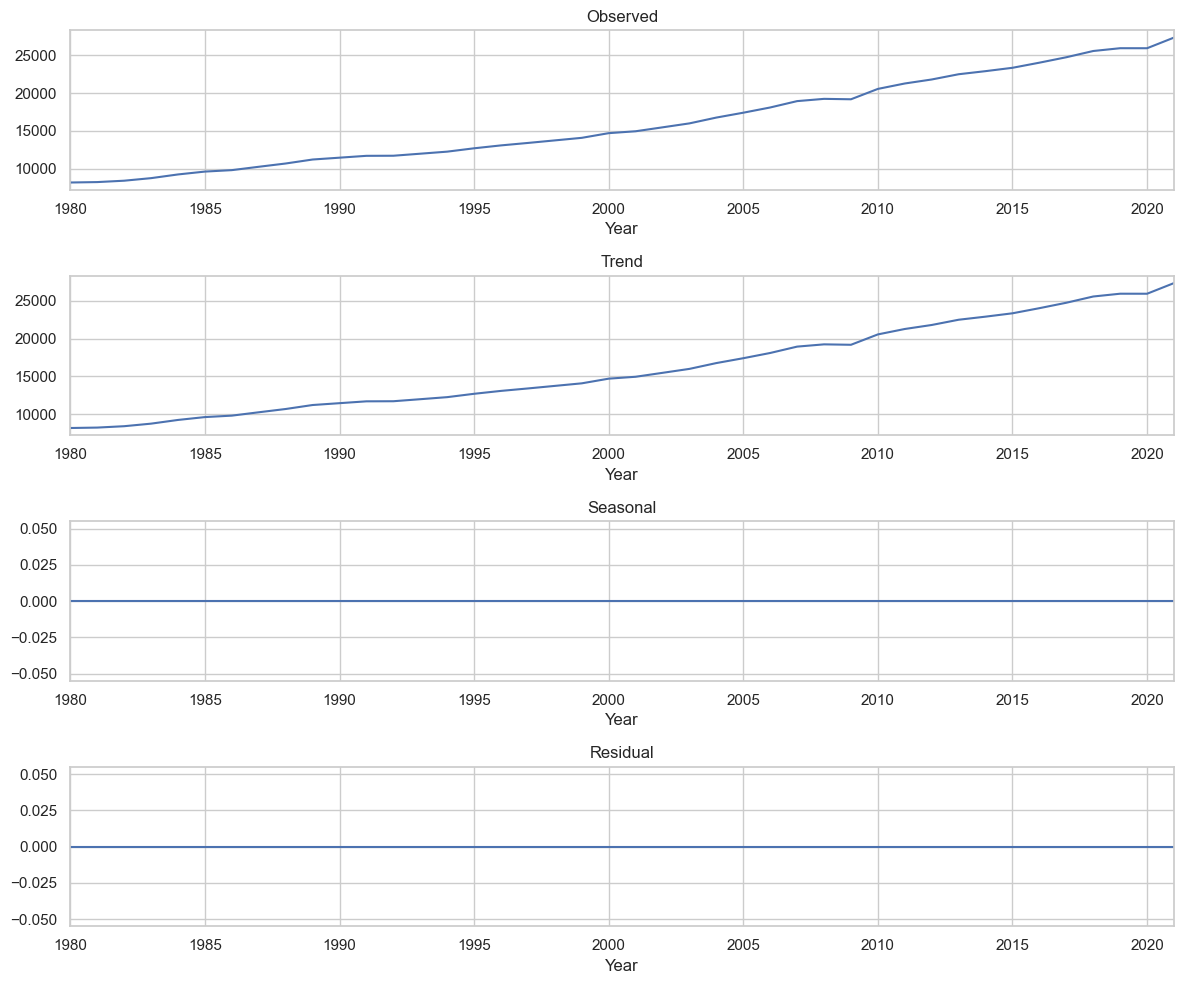

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Data Total Net Generation berdasarkan Tahun
global_year_grouped = df.groupby("Year")["Net Generation"].sum().reset_index()
global_year_grouped.set_index("Year", inplace=True)
global_year_grouped.index = pd.to_datetime(global_year_grouped.index, format="%Y")

# Dekomposisi time series untuk mengamati Trend, Seasonal, dan Residual
decomposition = seasonal_decompose(global_year_grouped["Net Generation"], model="additive")

# Plot Komponen dari Dekomposisi Time Series
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
decomposition.observed.plot(ax=ax1, title="Observed")
decomposition.trend.plot(ax=ax2, title="Trend")
decomposition.seasonal.plot(ax=ax3, title="Seasonal")
decomposition.resid.plot(ax=ax4, title="Residual")

plt.tight_layout()
plt.show()

> *Plot* *Observed* menunjukkan data asli dan menggambarkan variasi tahunan dalam produksi listrik global.

> *Plot* *Trend* menunjukkan adanya peningkatan produksi listrik secara global sejak tahun 1980, dengan percepatan yang lebih signifikan setelah tahun 2000.

> Tidak ada pola musiman yang jelas dalam data (ditunjukkan *plot* *Seasonal*) karena data ini adalah data tahunan dan produksi listrik tidak memiliki musim yang jelas pada skala global.

> *Plot* *Residual* menunjukkan bahwa variabilitas dalam deret waktu dapat dijelaskan sepenuhnya oleh komponen *trend* dan/atau musiman. Dengan kata lain, model yang digunakan untuk dekomposisi telah berhasil menangkap semua pola yang ada dalam data, dan tidak ada variabilitas atau "noise" acak yang tersisa.

> Sebelum melakukan *forecasting*, perlu dilakukan pengecekan stasioneritas dari deret waktu data. Jika deret waktu tidak stasioner, perlu dilakukan *differencing* agar deret waktunya stasioner.

In [28]:
from statsmodels.tsa.stattools import adfuller

# Mengecek stationarity time series menggunakan uji Augmented Dickey-Fuller
result = adfuller(global_year_grouped["Net Generation"])

# Extracting the p-value from the test result
p_value = result[1]

p_value

1.0

> Melakukan uji stasioneritas menggunakan uji Augmented Dickey-Fuller, jika *p-value* kurang dari $\alpha=0.05$, maka tolak $H_{0}$ yang artinya deret waktu tersebut adalah stasioner. Jika *p-value* lebih dari $\alpha=0.05$, maka perlu di-stasionerkan terlebih dahulu sebelum membangun model *forecasting*.

> *p-value* pada output di atas lebih dari $\alpha=0.05$, yang berarti deret waktu belum stasioner. Jika hasilnya seperti ini, perlu dilakukan *differencing* untuk membuat deret waktu stasioner.

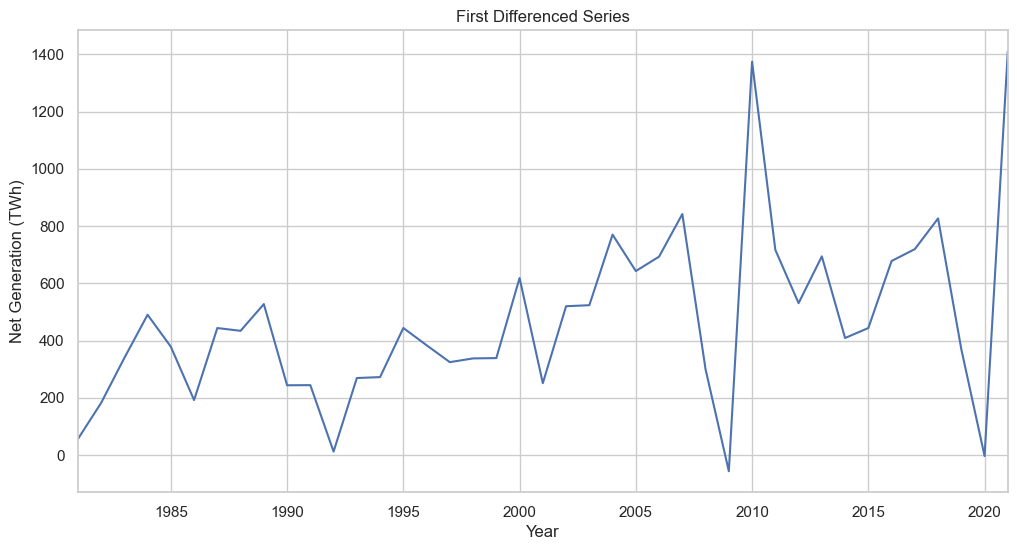

0.8848642641862945

In [29]:
# Differencing pertama pada data deret waktu
global_year_grouped_diff = global_year_grouped.diff().dropna()

# Melakukan uji Augmented Dickey-Fuller lagi pada Deret Differencing
result_diff = adfuller(global_year_grouped_diff["Net Generation"])

p_value_diff = result_diff[1]

# Plot Deret Differencing
plt.figure(figsize=(12, 6))
global_year_grouped_diff["Net Generation"].plot(title="First Differenced Series")
plt.xlabel("Year")
plt.ylabel("Net Generation (TWh)")
plt.show()

p_value_diff


> Setelah *differencing* pertama, *p-value* dari uji Augmented Dickey-Fuller adalah 0.88, yang berarti masih lebih besar dari $\alpha=0.05$, hal ini menunjukkan bahwa deret waktu masih tidak stasioner.

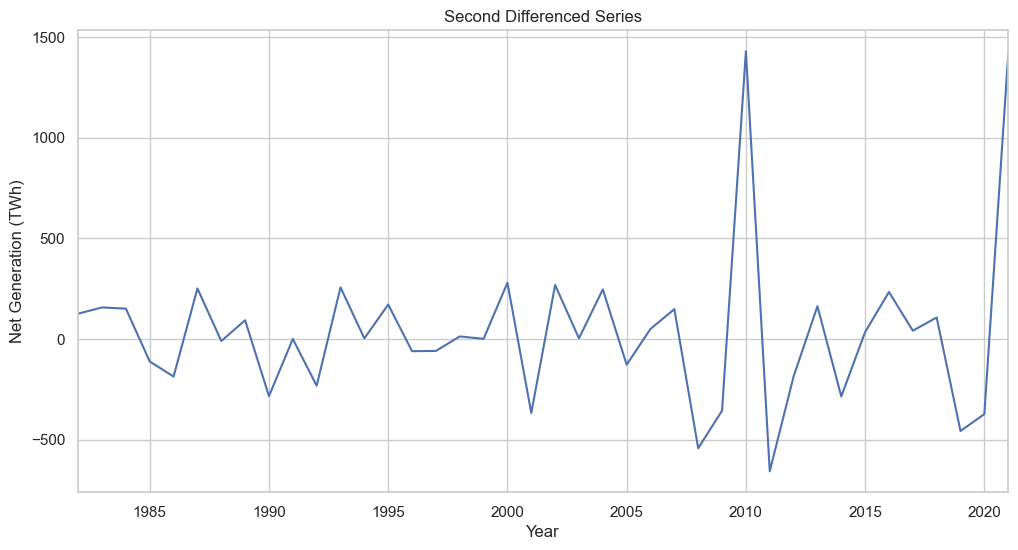

0.03907640594277995

In [30]:
# Melakukan Differencing untuk kedua kalinya pada data deret waktu
global_year_grouped_diff_2 = global_year_grouped_diff.diff().dropna()

# Melakukan uji Augmented Dickey-Fuller lagi pada Deret Differencing yang kedua
result_diff_2 = adfuller(global_year_grouped_diff_2["Net Generation"])

p_value_diff_2 = result_diff_2[1]

# Plot Deret Differencing yang kedua
plt.figure(figsize=(12, 6))
global_year_grouped_diff_2["Net Generation"].plot(title="Second Differenced Series")
plt.xlabel("Year")
plt.ylabel("Net Generation (TWh)")
plt.show()

p_value_diff_2


> Setelah *differencing* kedua, *p-value* dari uji Augmented Dickey-Fuller adalah 0.039, yang berarti lebih kecil dari $\alpha=0.05$, hal ini menunjukkan bahwa deret waktu sekarang sudah stasioner dan siap dilakukan *forecasting*.

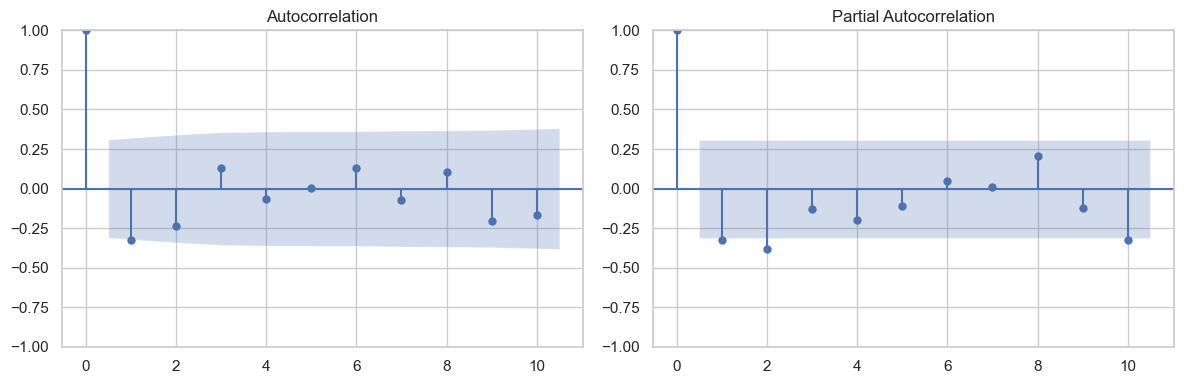

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Menentukan sumbu x (lags) untuk plot PACF
num_lags = min(10, global_year_grouped_diff_2.shape[0] // 2 - 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot ACF
plot_acf(global_year_grouped_diff_2["Net Generation"], lags=num_lags, ax=ax[0])

# Plot PACF
plot_pacf(global_year_grouped_diff_2["Net Generation"], lags=num_lags, ax=ax[1])

plt.tight_layout()
plt.show()


> Diketahui dari kedua plot di atas, lag yang signifikan untuk ACF adalah lag 1 dan untuk PACF adalah lag 2 karena lag-lag tersebut merupakan bar terakhir yang berada di luar *confidence area* plot ACF dan PACF.

# 3. Forecasting

In [32]:
from statsmodels.tsa.arima.model import ARIMA

# Model ARIMA (p=2, d=2, q=1)
model = ARIMA(global_year_grouped["Net Generation"], order=(2,2,1))
results = model.fit()

model_summary = results.summary()

# Forecasting untuk 10 tahun ke depan
forecast_period = 10
forecast = results.get_forecast(steps=forecast_period).predicted_mean
forecast_conf_int = results.get_forecast(steps=forecast_period).conf_int()

# Dataframe yang berisi hasil forecast beserta confidence intervalnya
forecast_df = pd.DataFrame({
    "Forecast": forecast,
    "Lower CI": forecast_conf_int.iloc[:, 0],
    "Upper CI": forecast_conf_int.iloc[:, 1]
})

model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Net Generation   No. Observations:                   42
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -282.807
Date:                Sun, 24 Sep 2023   AIC                            573.614
Time:                        09:00:42   BIC                            580.369
Sample:                    01-01-1980   HQIC                           576.056
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1967      0.125     -1.571      0.116      -0.442       0.049
ar.L2         -0.3669      0.227     -1.614      0.107      -0.813       0.079
ma.L1         -0.7607      0.131     -5.819      0.000      -1.017      -0.504
sigma2      7.341e+04   1.84e+04      3.987      0.000    3.73e+04    1.09e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 0.95
Prob(Q):                              0.61   Prob(JB):                         0.62
Heteroskedasticity (H):               5.43   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

> Terlihat bahwa *p-value* koefisien MovingAverage Lag 1 lebih kecil dari $\alpha=0.05$ yang artinya koefisien tersebut memiliki pengaruh yang signifikan terhadap variabel dependen, berbeda dengan AutoRegressive Lag 1 dan Lag 2 yang tidak memiliki pengaruh yang signifikan terhadap variabel dependen karena *p-value* yang lebih besar dari $\alpha=0.05$.

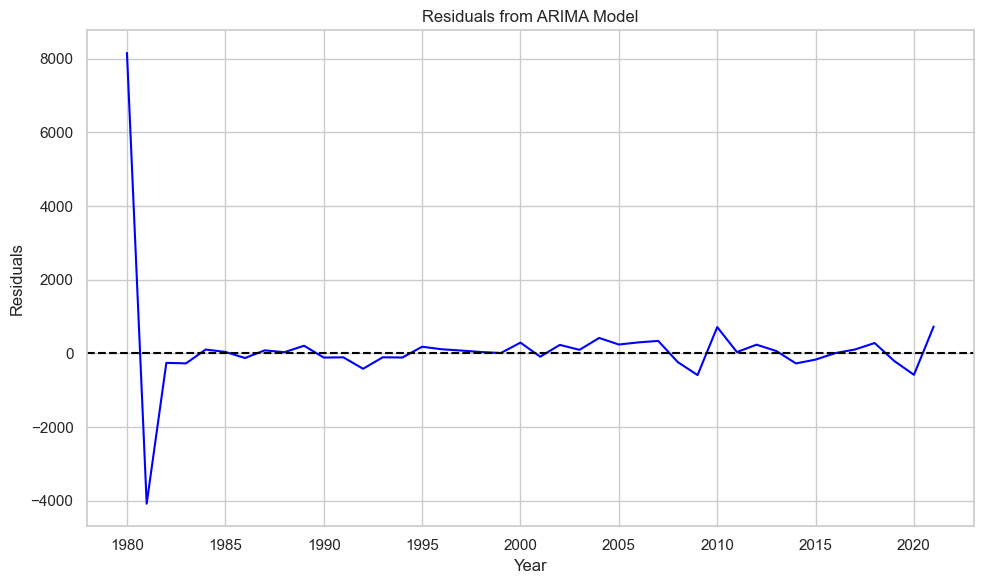

In [33]:
# Residual dari Model ARIMA
residuals = results.resid

# Plot Residual
plt.figure(figsize=(10,6))
plt.plot(residuals, color='blue')
plt.title('Residuals from ARIMA Model')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.axhline(0, color='black', linestyle='--')  # Garis horizontal y = 0
plt.tight_layout()
plt.show()

> Dari plot residu di atas, terlihat bahwa residu berkumpul pada garis horizontal y = 0 yang menunjukkan bahwa model ARIMA telah berhasil menangkap sebagian besar informasi dalam data dan merepresentasikan model yang baik untuk data.

In [34]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Fitted Values
fitted_values = results.fittedvalues

# RMSE yang diukur melalui data asli dengan fitted values
# Karena d=2, maka 2 observasi pertama tidak memiliki fitted values
rmse = np.sqrt(mean_squared_error(global_year_grouped.iloc[2:], fitted_values[2:]))
rmse


281.6083832231545

> Model ARIMA, rata-rata memprediksi produksi listrik bersih dengan kesalahan sekitar 281.61 TWh dari nilai sebenarnya. Ini berarti, untuk setiap prediksi yang dibuat oleh model, prediksi tersebut akan rata-rata menyimpang sekitar 281.61 unit dari nilai sebenarnya.

In [35]:
forecast_df

,Forecast,Lower CI,Upper CI
2022-01-01,28066.631038,27535.598093,28597.663982
2023-01-01,28397.935256,27630.809268,29165.061243
2024-01-01,29060.466571,28154.810072,29966.123071
2025-01-01,29797.818459,28703.440543,30892.196376
2026-01-01,30398.918005,29076.844974,31720.991036
2027-01-01,30999.372134,29456.697475,32542.046794
2028-01-01,31649.946039,29881.402633,33418.489445
2029-01-01,32290.895839,30279.260663,34302.531014
2030-01-01,32915.349542,30650.051738,35180.647345
2031-01-01,33546.580015,31020.460481,36072.699548


> Diketahui hasil *forecast* 10 tahun ke depan dari tahun 2021 dan juga diketahui *confidence interval*-nya yang memiliki arti, jika hasil *forecast* berada di dalam rentang *confidence interval*, maka tidak terdapat perbedaan yang signifikan antara hasil *forecast* dengan Net Generation yang sebenarnya.

# 4. Smoothing

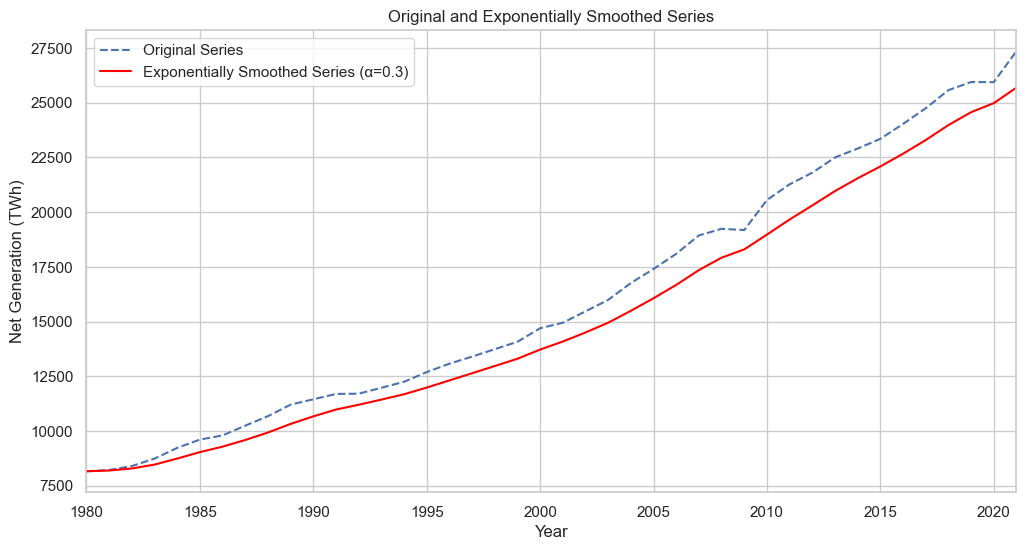

In [36]:
# Exponential Smoothing
alpha = 0.3 # Smoothing factor
global_year_grouped_smoothed = global_year_grouped["Net Generation"].ewm(alpha=alpha).mean()

# Plot deret yang original dan yang telah dilakukan smoothing
plt.figure(figsize=(12, 6))
global_year_grouped["Net Generation"].plot(label="Original Series", linestyle='dashed')
global_year_grouped_smoothed.plot(label=f"Exponentially Smoothed Series (α={alpha})", color="red")
plt.title("Original and Exponentially Smoothed Series")
plt.xlabel("Year")
plt.ylabel("Net Generation (TWh)")
plt.legend()
plt.show()


> Hasil dari *Exponential Smoothing* menunjukkan versi yang lebih halus dari dari deret waktu asli, hal ini dapat membantu dalam mengidentifikasi tren dasar dalam data lebih jelas.

# 5. *Insight* dan Kesimpulan

1. **Pertumbuhan Produksi Listrik**

* Ada trend peningkatan produksi listrik global sepanjang waktu, terutama dipimpin oleh region Asia. Pernyataan ini sesuai dengan *plot* *`Trend of Net Generation per Region*` (1980-2021).

2. **Kebutuhan Energi dan Kebijakan Energi**
* Ada ketidaksetaraan signifikan dalam produksi listrik antar negara dan region, menunjukkan adanya ketidaksetaraan dalam akses terhadap energi. Pernyataan ini ditunjukkan pada *bar plot* *`Bottom 10 Countries by Net Generation* (2021)`*.

3. **Trend, Seasonality, dan Residuals**

* Komponen *trend* menunjukkan bahwa produksi listrik secara global cenderung meningkat sepanjang waktu (trend positif). Tidak ada pola musiman (*seasonality*) yang jelas teridentifikasi dari analisis, dan *residuals* merepresentasikan variabilitas yang tidak dijelaskan oleh model.

3. **Ketidakpastian dan Model Validasi**
* Meskipun model ARIMA dapat mengidentifikasi tren dan membuat prediksi berdasarkan data historis, hasilnya harus diinterpretasikan dengan hati-hati karena ketidakpastian inheren dalam proses *modelling*. Maksud dari ketidakpastian inheren adalah ketidakpastian karena faktor-faktor seperti variasi acak dalam data, kekurangan informasi, atau keterbatasan dalam metode pemodelan.

4. **Smoothing dan Identifikasi Trend**
* *Exponential Smoothing* menunjukkan versi yang lebih halus dari deret waktu, hal ini bisa membantu dalam mengidentifikasi tren dasar dalam data lebih jelas. Pernyataan ini ditunjukkan pada *plot* *`Original and Exponentially Smoothed Series`*.

5. **Strategi dan Pembangunan Berkelanjutan, serta Rekomendasi**
* Prediksi pertumbuhan produksi listrik yang terus berlanjut menekankan kebutuhan untuk transisi ke sumber energi yang lebih berkelanjutan dan efisien.

* Negara-negara dengan produksi listrik rendah harus menjadikan pengembangan infrastruktur energi sebagai prioritas, dengan fokus pada energi terbarukan dan teknologi energi bersih.

* Penting untuk investasi dalam penelitian dan pengembangan untuk teknologi energi baru dan lebih efisien yang dilakukan dengan kebijakan yang mendukung penggunaan energi terbarukan dan efisiensi energi.

* Sebelum melakukan analisis time series, data harus displit ke data train dan data test terlebih dahulu untuk mencegah terjadinya overfitting dan agar model dapat menggeneralisasi pola yang telah dipelajari ke data yang belum pernah dilihat sebelumnya.